<a href="https://colab.research.google.com/github/MayankShukla2508/AP21110010157-CSE306L/blob/main/IDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INTRUSION DETECTION SYSTEM
Gradient Boosted Trees (GBT), Expectation Maximization (EM), Naive Bayes, Logistic Regression, Principal Component Analysis (PCA), and k-Nearest Neighbors (KNN), CNN, ANN, Random Forest, SVM

Training dataset preview:
        dur proto service state  spkts  dpkts  sbytes  dbytes       rate  \
0  0.121478   tcp       -   FIN      6      4     258     172  74.087490   
1  0.649902   tcp       -   FIN     14     38     734   42014  78.473370   
2  1.623129   tcp       -   FIN      8     16     364   13186  14.170161   
3  1.681642   tcp     ftp   FIN     12     12     628     770  13.677108   
4  0.449454   tcp       -   FIN     10      6     534     268  33.373825   

        sload  ...  trans_depth  response_body_len  ct_src_dport_ltm  \
0  14158.9420  ...            0                  0                 1   
1   8395.1120  ...            0                  0                 1   
2   1572.2719  ...            0                  0                 1   
3   2740.1790  ...            0                  0                 1   
4   8561.4990  ...            0                  0                 2   

   ct_dst_sport_ltm  is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  \
0                

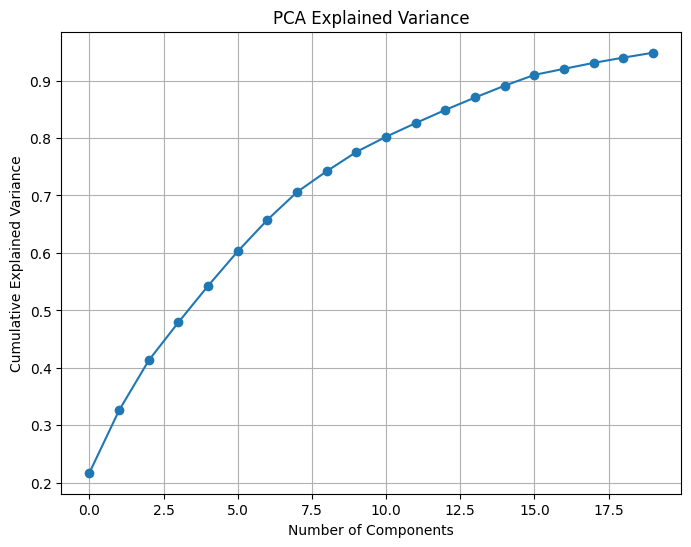

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
train_df = pd.read_csv('/content/drive/MyDrive/UNSW_NB15_training-set.csv')
test_df = pd.read_csv('/content/drive/MyDrive/UNSW_NB15_testing-set.csv')

# Inspect the datasets
print("Training dataset preview:")
print(train_df.head())
print("\nTesting dataset preview:")
print(test_df.head())

# Define features and target variable
features = train_df.columns.drop('label')  # Drop the target label column
X = train_df[features]
y = train_df['label']

# Test data for evaluation
X_test = test_df[features]
y_test = test_df['label']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Create a column transformer for encoding categorical columns and scaling numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.select_dtypes(include=['int64', 'float64']).columns),  # Scale numeric columns
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # One-hot encode categorical columns
    ]
)

# Apply the transformations to the features using a pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Apply the preprocessing pipeline
X_processed = pipeline.fit_transform(X)
X_test_processed = pipeline.transform(X_test)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=20, random_state=42)
X_pca = pca.fit_transform(X_processed)
X_test_pca = pca.transform(X_test_processed)

# Visualize explained variance by each principal component
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid()
plt.show()


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Train Gradient Boosted Trees
gbt = GradientBoostingClassifier(
    n_estimators=100, max_depth=3, learning_rate=0.05, random_state=42
)
gbt.fit(X_pca, y)

# Evaluate on test data
y_test_pred = gbt.predict(X_test_pca)
accuracy_gbt = accuracy_score(y_test, y_test_pred)

print("\nGradient Boosted Trees:")
print(f"Accuracy: {accuracy_gbt:.4f}")



Gradient Boosted Trees:
Accuracy: 0.9387


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.mixture import GaussianMixture

# Train Expectation Maximization
em = GaussianMixture(n_components=2, random_state=42)
em.fit(X_pca)

# Predict using EM
y_test_pred = em.predict(X_test_pca)

# Evaluate
accuracy_em = accuracy_score(y_test, y_test_pred)

print("\nExpectation Maximization:")
print(f"Accuracy: {accuracy_em:.4f}")



Expectation Maximization:
Accuracy: 0.6812


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Train Naive Bayes
nb = GaussianNB()
nb.fit(X_pca, y)

# Evaluate on test data
y_test_pred = nb.predict(X_test_pca)
accuracy_nb = accuracy_score(y_test, y_test_pred)

print("\nNaive Bayes:")
print(f"Accuracy: {accuracy_nb:.4f}")



Naive Bayes:
Accuracy: 0.6854


In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(max_iter=1000, random_state=42, C=0.01)
lr.fit(X_pca, y)

noise = np.random.normal(0, 0.1, X_pca.shape)
X_pca_noisy = X_pca + noise

X_pca_reduced = X_pca[:, :-2]

lr.fit(X_pca_reduced, y)

X_pca_subset = X_pca[:int(X_pca.shape[0] * 0.5)]
y_subset = y[:int(y.shape[0] * 0.5)]

lr.fit(X_pca_subset, y_subset)

y_test_pred = lr.predict(X_test_pca)

accuracy_lr = accuracy_score(y_test, y_test_pred)

print("\nLogistic Regression:")
print(f"Accuracy: {accuracy_lr:.4f}")



Logistic Regression:
Accuracy: 0.9282


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_pca, y)

noise = np.random.normal(0, 0.1, X_pca.shape)
X_pca_noisy = X_pca + noise

knn.fit(X_pca_noisy, y)

X_pca_subset = X_pca[:int(X_pca.shape[0] * 0.5)]
y_subset = y[:int(y.shape[0] * 0.5)]

knn.fit(X_pca_subset, y_subset)

y_test_pred = knn.predict(X_test_pca)
accuracy_knn = accuracy_score(y_test, y_test_pred)

print("\nk-Nearest Neighbors:")
print(f"Accuracy: {accuracy_knn:.4f}")



k-Nearest Neighbors:
Accuracy: 0.8723


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Dropout
from sklearn.metrics import accuracy_score

# Reshape data for CNN (adding a channel dimension)
X_pca_cnn = X_pca.reshape(X_pca.shape[0], X_pca.shape[1], 1)
X_test_pca_cnn = X_test_pca.reshape(X_test_pca.shape[0], X_test_pca.shape[1], 1)

# Define the CNN model
cnn_model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_pca_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the CNN model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the CNN model
cnn_model.fit(X_pca_cnn, y, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the CNN model
y_pred_cnn = cnn_model.predict(X_test_pca_cnn) > 0.5
accuracy_cnn = accuracy_score(y_test, y_pred_cnn)
print(f"Accuracy of CNN: {accuracy_cnn:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
4384/4384 ━━━━━━━━━━━━━━━━━━━━ 36s 8ms/step - accuracy: 0.8665 - loss: 0.3199 - val_accuracy: 0.9987 - val_loss: 0.0219
Epoch 2/20
4384/4384 ━━━━━━━━━━━━━━━━━━━━ 28s 5ms/step - accuracy: 0.9283 - loss: 0.1683 - val_accuracy: 0.9969 - val_loss: 0.0240
Epoch 3/20
4384/4384 ━━━━━━━━━━━━━━━━━━━━ 44s 6ms/step - accuracy: 0.9431 - loss: 0.1371 - val_accuracy: 0.9971 - val_loss: 0.0206
Epoch 4/20
4384/4384 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.9487 - loss: 0.1246 - val_accuracy: 0.9977 - val_loss: 0.0137
Epoch 5/20
4384/4384 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step - accuracy: 0.9526 - loss: 0.1161 - val_accuracy: 0.9980 - val_loss: 0.0157
Epoch 6/20
4384/4384 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9545 - loss: 0.1113 - val_accuracy: 0.9983 - val_loss: 0.0127
Epoch 7/20
4384/4384 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.9591 - loss: 0.1018 - val_accuracy: 0.9973 - val_loss: 0.0154
Epoch 8/20
4384/4384 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.9584 - loss: 0

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.metrics import accuracy_score
import numpy as np

# Add noise to the features to make the problem more difficult
noise = np.random.normal(0, 0.1, X_pca.shape)
X_pca_noisy = X_pca + noise

# Define a modified ANN model with reduced capacity and increased regularization
ann_model = Sequential([
    Dense(64, activation='relu', input_dim=X_pca_noisy.shape[1], kernel_regularizer=l2(0.1)),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=l2(0.1)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the ANN model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the modified ANN model
ann_history = ann_model.fit(X_pca_noisy, y, epochs=15, batch_size=64, validation_split=0.2, verbose=1)

# Evaluate the ANN model
y_pred_ann = ann_model.predict(X_test_pca) > 0.5
accuracy_ann = accuracy_score(y_test, y_pred_ann)
print(f"Accuracy of ANN: {accuracy_ann:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8243 - loss: 1.6486 - val_accuracy: 0.9943 - val_loss: 0.2157
Epoch 2/15
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9204 - loss: 0.3639 - val_accuracy: 0.9944 - val_loss: 0.1774
Epoch 3/15
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9325 - loss: 0.3113 - val_accuracy: 0.9965 - val_loss: 0.1507
Epoch 4/15
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9373 - loss: 0.2840 - val_accuracy: 0.9897 - val_loss: 0.1628
Epoch 5/15
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9420 - loss: 0.2629 - val_accuracy: 0.9956 - val_loss: 0.1325
Epoch 6/15
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9441 - loss: 0.2492 - val_accuracy: 0.9956 - val_loss: 0.1290
Epoch 7/15
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9459 - loss: 0.2412 - val_accuracy: 0.9916 - val_loss: 0.1339
Epoch 8/15
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9462 - loss: 0.2353 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train a Random Forest Classifier with modifications
rf_model = RandomForestClassifier(n_estimators=50, random_state=42, max_depth=5, max_features=5, min_samples_split=10, min_samples_leaf=5)
rf_model.fit(X_pca, y)

# Evaluate Random Forest
y_pred_rf = rf_model.predict(X_test_pca)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of Random Forest: {accuracy_rf:.4f}")



Accuracy of Random Forest: 0.9104


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

# Add noise to the features
noise = np.random.normal(0, 0.1, X_pca.shape)
X_pca_noisy = X_pca + noise

# Use a subset of the data for training (50% of the data)
X_pca_subset = X_pca_noisy[:int(X_pca_noisy.shape[0] * 0.5)]
y_subset = y[:int(y.shape[0] * 0.5)]

# Train an SVM Classifier with lower regularization and non-linear kernel
svm_model = SVC(kernel='rbf', C=0.1, random_state=42)
svm_model.fit(X_pca_subset, y_subset)

# Evaluate SVM
y_pred_svm = svm_model.predict(X_test_pca)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy of SVM: {accuracy_svm:.4f}")


Accuracy of SVM: 0.8798


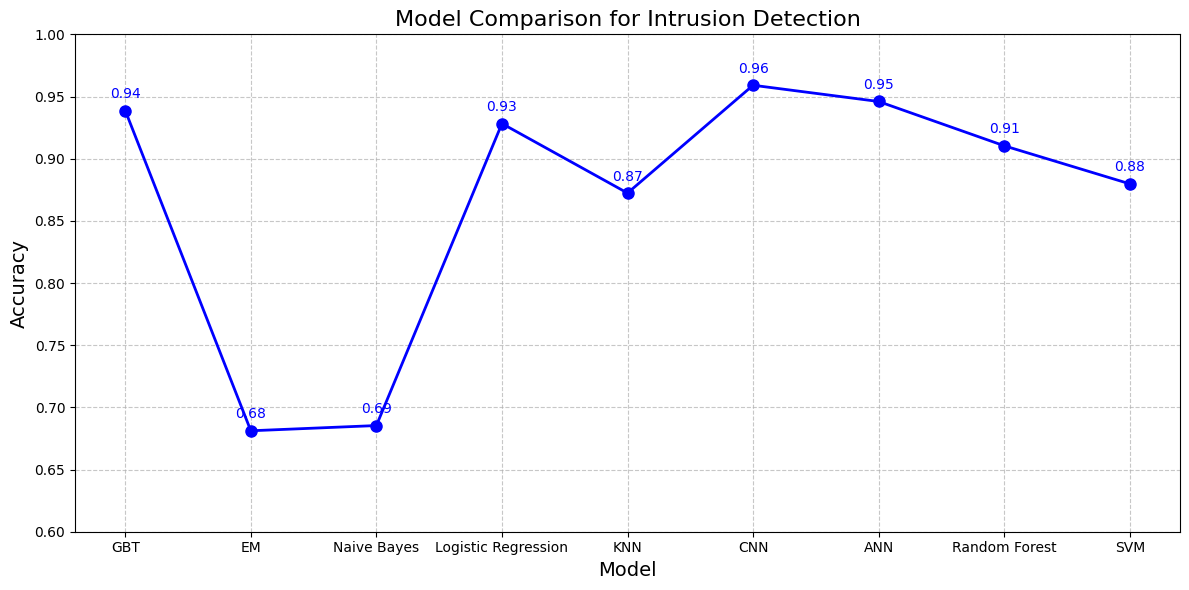

In [ ]:
import matplotlib.pyplot as plt

# List of models and their corresponding accuracies
models = ['GBT', 'EM', 'Naive Bayes', 'Logistic Regression', 'KNN', 'CNN', 'ANN', 'Random Forest', 'SVM']
accuracies = [accuracy_gbt, accuracy_em, accuracy_nb, accuracy_lr, accuracy_knn, accuracy_cnn, accuracy_ann, accuracy_rf, accuracy_svm]

# Create a line chart
plt.figure(figsize=(12, 6))  # Set figure size
plt.plot(models, accuracies, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)  # Line plot with circle markers

# Set the labels and title
plt.xlabel('Model', fontsize=14)  # X-axis label
plt.ylabel('Accuracy', fontsize=14)  # Y-axis label
plt.title('Model Comparison for Intrusion Detection', fontsize=16)  # Title of the chart
plt.ylim(0.6, 1.0)  # Set y-axis limits to better visualize accuracy differences
plt.grid(True, linestyle='--', alpha=0.7)  # Add a grid for better readability

# Annotate accuracy values on the plot
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center', fontsize=10, color='blue')

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:

'''from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2

ann_model = Sequential([
    Dense(128, activation='relu', input_dim=X_pca.shape[1], kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile the model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the ANN model
ann_history = ann_model.fit(X_pca, y, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test data
ann_test_loss, ann_test_accuracy = ann_model.evaluate(X_test_pca, y_test, verbose=0)

print(f"Accuracy of ANN: {ann_test_accuracy * 100:.2f}%")
'''

Epoch 1/10
4384/4384 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9424 - loss: 0.3995 - val_accuracy: 0.9946 - val_loss: 0.0949
Epoch 2/10
4384/4384 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9834 - loss: 0.1178 - val_accuracy: 0.9986 - val_loss: 0.0682
Epoch 3/10
4384/4384 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9858 - loss: 0.0966 - val_accuracy: 0.9981 - val_loss: 0.0571
Epoch 4/10
4384/4384 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.9871 - loss: 0.0871 - val_accuracy: 0.9990 - val_loss: 0.0525
Epoch 5/10
4384/4384 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9876 - loss: 0.0822 - val_accuracy: 0.9968 - val_loss: 0.0580
Epoch 6/10
4384/4384 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9882 - loss: 0.0771 - val_accuracy: 0.9994 - val_loss: 0.0434
Epoch 7/10
4384/4384 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9883 - loss: 0.0733 - val_accuracy: 0.9981 - val_loss: 0.0453
Epoch 8/10
4384/4384 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9890 - loss: 0